## EDA And Feature Engineering Flight Price Prediction
### FEATURES
The various features of the cleaned dataset are explained below:<br>
1) **Airline:** The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.<br>
2) **Flight:** Flight stores information regarding the plane's flight code. It is a categorical feature.<br>
3) **Source City:** City from which the flight takes off. It is a categorical feature having 6 unique cities.<br>
4) **Departure Time:** This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.<br>
5) **Stops:** A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.<br>
6) **Arrival Time:** This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.<br>
7) **Destination City:** City where the flight will land. It is a categorical feature having 6 unique cities.<br>
8) **Class:** A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.<br>
9) **Duration:** A continuous feature that displays the overall amount of time it takes to travel between cities in hours.<br>
10) **Days Left:** This is a derived characteristic that is calculated by subtracting the trip date by the booking date.<br>
11) **Price:** Target variable stores information of the ticket price.<br>

In [157]:
#importing basics libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [158]:
df=pd.read_excel('flight_price.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [160]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [161]:



df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [162]:
##Dividing date month and year for seperate features
df['Date']=df['Date_of_Journey'].str.split('/').str[0]
df['Month']=df['Date_of_Journey'].str.split('/').str[1]
df['Year']=df['Date_of_Journey'].str.split('/').str[2]
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019


In [163]:
##converting them into integer so ML model can understand
df['Date']=df['Date'].astype(int)
df['Month']=df['Month'].astype(int)
df['Year']=df['Year'].astype(int)

In [164]:
#deleting the old dates
df.drop('Date_of_Journey',axis=1,inplace=True)
df.head(5)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [165]:
##now splitting the arrival time nd converting into integer
df['Arrival_Time'].str.split(' ').str[0]

0        01:10
1        13:15
2        04:25
3        23:30
4        21:35
         ...  
10678    22:25
10679    23:20
10680    11:20
10681    14:10
10682    19:15
Name: Arrival_Time, Length: 10683, dtype: object

In [166]:
df['Arrival_hour']=df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[0]
df['Arrival_minute']=df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[1]
df.drop('Arrival_Time',axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Duration         10683 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10683 non-null  object
 8   Price            10683 non-null  int64 
 9   Date             10683 non-null  int64 
 10  Month            10683 non-null  int64 
 11  Year             10683 non-null  int64 
 12  Arrival_hour     10683 non-null  object
 13  Arrival_minute   10683 non-null  object
dtypes: int64(4), object(10)
memory usage: 1.1+ MB


In [167]:
##converting in int
df['Arrival_hour']=df['Arrival_hour'].astype(int)
df['Arrival_minute']=df['Arrival_minute'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Duration         10683 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10683 non-null  object
 8   Price            10683 non-null  int64 
 9   Date             10683 non-null  int64 
 10  Month            10683 non-null  int64 
 11  Year             10683 non-null  int64 
 12  Arrival_hour     10683 non-null  int64 
 13  Arrival_minute   10683 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 1.1+ MB


In [168]:
df.head(3)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,9,6,2019,4,25


In [169]:
#deleting the route because there is no need 
df.drop('Route',axis=1,inplace=True)

In [170]:
df.head(2)

,Airline,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,22:20,2h 50m,non-stop,No info,3897,24,3,2019,1,10
1,Air India,Kolkata,Banglore,05:50,7h 25m,2 stops,No info,7662,1,5,2019,13,15


In [171]:
##splitting duration hour and min
df['Duration_hour']=df['Duration'].str.split(' ').str[0].str.split('h').str[0].str.split('h').str[0]
df['Duration_minute']=df['Duration'].str.split(' ').str[1].str.split('h').str[0].str.split('m').str[0]

In [172]:
df.head(2)

,Airline,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,22:20,2h 50m,non-stop,No info,3897,24,3,2019,1,10,2,50
1,Air India,Kolkata,Banglore,05:50,7h 25m,2 stops,No info,7662,1,5,2019,13,15,7,25


In [173]:
##converting them in to int so ML can learn easily
df=df[df['Duration_hour']!='5m']
df['Duration_minute']=df['Duration_minute'].fillna(0)
df['Duration_hour']=df['Duration_hour'].astype(int)
df['Duration_minute']=df['Duration_minute'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Dep_Time         10682 non-null  object
 4   Duration         10682 non-null  object
 5   Total_Stops      10681 non-null  object
 6   Additional_Info  10682 non-null  object
 7   Price            10682 non-null  int64 
 8   Date             10682 non-null  int64 
 9   Month            10682 non-null  int64 
 10  Year             10682 non-null  int64 
 11  Arrival_hour     10682 non-null  int64 
 12  Arrival_minute   10682 non-null  int64 
 13  Duration_hour    10682 non-null  int64 
 14  Duration_minute  10682 non-null  int64 
dtypes: int64(8), object(7)
memory usage: 1.3+ MB


<ipython-input-173-6ea9dd487943>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Duration_minute']=df['Duration_minute'].fillna(0)
<ipython-input-173-6ea9dd487943>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Duration_hour']=df['Duration_hour'].astype(int)
<ipython-input-173-6ea9dd487943>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

In [174]:
##now add all hour & min and converting into minutes and delete unnecessary
df['Total_Duration_In_Minutes']=(60*df['Duration_hour'] + df['Duration_minute'])
df.drop(['Duration_hour','Duration_minute','Duration'],axis=1,inplace=True)
df.head()

,Airline,Source,Destination,Dep_Time,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minute,Total_Duration_In_Minutes
0,IndiGo,Banglore,New Delhi,22:20,non-stop,No info,3897,24,3,2019,1,10,170
1,Air India,Kolkata,Banglore,05:50,2 stops,No info,7662,1,5,2019,13,15,445
2,Jet Airways,Delhi,Cochin,09:25,2 stops,No info,13882,9,6,2019,4,25,1140
3,IndiGo,Kolkata,Banglore,18:05,1 stop,No info,6218,12,5,2019,23,30,325
4,IndiGo,Banglore,New Delhi,16:50,1 stop,No info,13302,1,3,2019,21,35,285


In [175]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [176]:
df['Total_Stops'].mode()

0    1 stop
Name: Total_Stops, dtype: object

In [177]:
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,np.nan:1})

In [178]:
df['Total_Stops'].isnull().sum()

0

In [179]:
df.head()

,Airline,Source,Destination,Dep_Time,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minute,Total_Duration_In_Minutes
0,IndiGo,Banglore,New Delhi,22:20,0,No info,3897,24,3,2019,1,10,170
1,Air India,Kolkata,Banglore,05:50,2,No info,7662,1,5,2019,13,15,445
2,Jet Airways,Delhi,Cochin,09:25,2,No info,13882,9,6,2019,4,25,1140
3,IndiGo,Kolkata,Banglore,18:05,1,No info,6218,12,5,2019,23,30,325
4,IndiGo,Banglore,New Delhi,16:50,1,No info,13302,1,3,2019,21,35,285


In [180]:
## Now Let's handle Additional Info
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [181]:
df['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [182]:
# as most of data is of no info,let's delete this column
df.drop('Additional_Info', axis=1,inplace=True)

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Airline                    10682 non-null  object
 1   Source                     10682 non-null  object
 2   Destination                10682 non-null  object
 3   Dep_Time                   10682 non-null  object
 4   Total_Stops                10682 non-null  int64 
 5   Price                      10682 non-null  int64 
 6   Date                       10682 non-null  int64 
 7   Month                      10682 non-null  int64 
 8   Year                       10682 non-null  int64 
 9   Arrival_hour               10682 non-null  int64 
 10  Arrival_minute             10682 non-null  int64 
 11  Total_Duration_In_Minutes  10682 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.1+ MB


In [184]:
##split dept time in min and hour
df['Departure_hour']=df['Dep_Time'].str.split(':').str[0]
df['Departure_minute']=df['Dep_Time'].str.split(':').str[1]
##set them into int
df['Departure_hour']=df['Departure_hour'].astype(int)
df['Departure_minute']=df['Departure_minute'].astype(int)
##now delete old departure time
df.drop('Dep_Time',axis=1,inplace=True)
df.head()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Arrival_hour,Arrival_minute,Total_Duration_In_Minutes,Departure_hour,Departure_minute
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,1,10,170,22,20
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,13,15,445,5,50
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,4,25,1140,9,25
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,23,30,325,18,5
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,21,35,285,16,50


In [186]:
##check for missing data 
df.isnull().sum()

Airline                      0
Source                       0
Destination                  0
Total_Stops                  0
Price                        0
Date                         0
Month                        0
Year                         0
Arrival_hour                 0
Arrival_minute               0
Total_Duration_In_Minutes    0
Departure_hour               0
Departure_minute             0
dtype: int64

In [187]:
##check for duplicate values
df.duplicated().sum()

222

In [188]:
##drop the duplicate values
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [189]:
df

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Arrival_hour,Arrival_minute,Total_Duration_In_Minutes,Departure_hour,Departure_minute
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,1,10,170,22,20
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,13,15,445,5,50
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,4,25,1140,9,25
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,23,30,325,18,5
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,21,35,285,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,2019,22,25,150,19,55
10679,Air India,Kolkata,Banglore,0,4145,27,4,2019,23,20,155,20,45
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,2019,11,20,180,8,20
10681,Vistara,Banglore,New Delhi,0,12648,1,3,2019,14,10,160,11,30


In [190]:
##now let's convert categories values to numerical
df['Airline'].nunique(),df['Source'].nunique(),df['Destination'].nunique()

(12, 5, 6)

In [191]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df['Airline']=label.fit_transform(df[['Airline']])
df['Source']=label.fit_transform(df[['Source']])
df['Destination']=label.fit_transform(df[['Destination']])

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [192]:
df

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Arrival_hour,Arrival_minute,Total_Duration_In_Minutes,Departure_hour,Departure_minute
0,3,0,5,0,3897,24,3,2019,1,10,170,22,20
1,1,3,0,2,7662,1,5,2019,13,15,445,5,50
2,4,2,1,2,13882,9,6,2019,4,25,1140,9,25
3,3,3,0,1,6218,12,5,2019,23,30,325,18,5
4,3,0,5,1,13302,1,3,2019,21,35,285,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,0,4107,9,4,2019,22,25,150,19,55
10679,1,3,0,0,4145,27,4,2019,23,20,155,20,45
10680,4,0,2,0,7229,27,4,2019,11,20,180,8,20
10681,10,0,5,0,12648,1,3,2019,14,10,160,11,30


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10460 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Airline                    10460 non-null  int64
 1   Source                     10460 non-null  int64
 2   Destination                10460 non-null  int64
 3   Total_Stops                10460 non-null  int64
 4   Price                      10460 non-null  int64
 5   Date                       10460 non-null  int64
 6   Month                      10460 non-null  int64
 7   Year                       10460 non-null  int64
 8   Arrival_hour               10460 non-null  int64
 9   Arrival_minute             10460 non-null  int64
 10  Total_Duration_In_Minutes  10460 non-null  int64
 11  Departure_hour             10460 non-null  int64
 12  Departure_minute           10460 non-null  int64
dtypes: int64(13)
memory usage: 1.1 MB


**Visualization**

In [194]:
df["Year"].value_counts()

2019    10460
Name: Year, dtype: int64

In [195]:
##Only one year’s Data is Given. i.e, For this data Year may not have much significance

In [196]:
df["Month"].value_counts()

5    3396
6    3311
3    2675
4    1078
Name: Month, dtype: int64

In [197]:
## Data is present for months March, April, May and June of 2019

In [198]:
df.groupby("Month")["Price"].mean()

Month
3    10696.395140
4     5766.545455
5     9028.783569
6     8736.152522
Name: Price, dtype: float64

In [199]:
## March has much flight ticket rates followed by May , June and April has the least

In [200]:
df

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Arrival_hour,Arrival_minute,Total_Duration_In_Minutes,Departure_hour,Departure_minute
0,3,0,5,0,3897,24,3,2019,1,10,170,22,20
1,1,3,0,2,7662,1,5,2019,13,15,445,5,50
2,4,2,1,2,13882,9,6,2019,4,25,1140,9,25
3,3,3,0,1,6218,12,5,2019,23,30,325,18,5
4,3,0,5,1,13302,1,3,2019,21,35,285,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,0,4107,9,4,2019,22,25,150,19,55
10679,1,3,0,0,4145,27,4,2019,23,20,155,20,45
10680,4,0,2,0,7229,27,4,2019,11,20,180,8,20
10681,10,0,5,0,12648,1,3,2019,14,10,160,11,30


<Axes: xlabel='Total_Stops', ylabel='Price'>

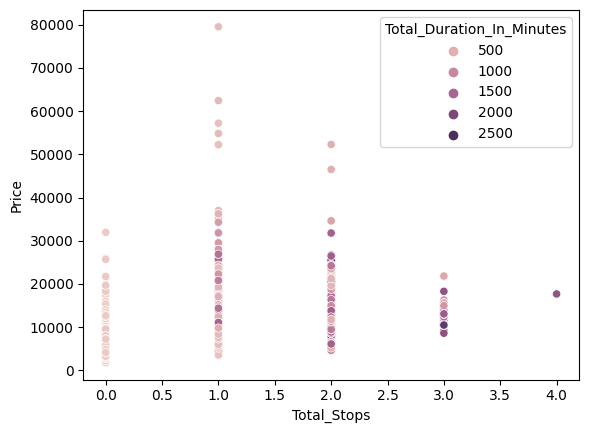

In [201]:
sns.scatterplot(y=df.Price,x=df.Total_Stops,hue=df["Total_Duration_In_Minutes"])

• Amount is less when there are “Zero” stops, and all the    duration in minutes ranges beyond 500 only. <br>
• Amount is slightly high if there is 1 stop compared to others, and all duration minutes are less than 1500.<br>
• When there are 3 stops, amount is less but , Total Distance is more.

<Axes: xlabel='Total_Duration_In_Minutes', ylabel='Price'>

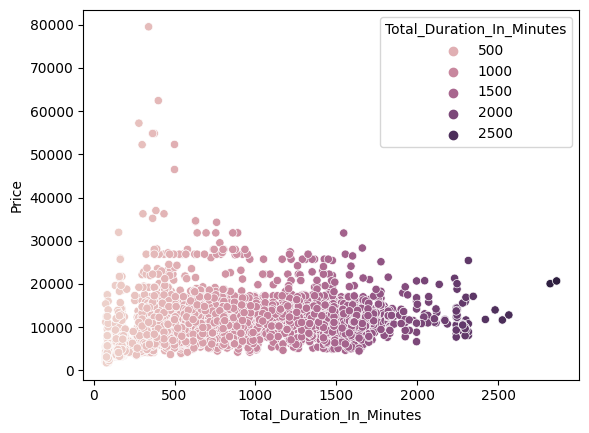

In [202]:
sns.scatterplot(y=df.Price,x=df.
                Total_Duration_In_Minutes,hue=df["Total_Duration_In_Minutes"])

<Axes: xlabel='Price', ylabel='Month'>

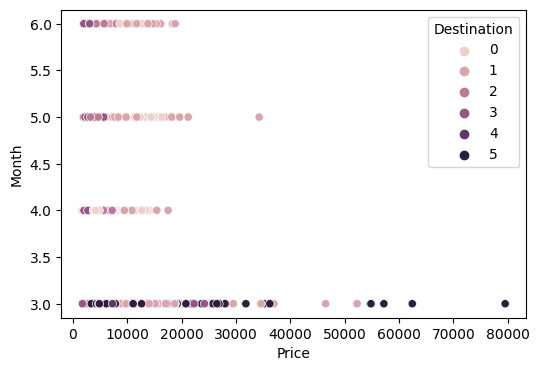

In [206]:
## price is high when Duration time is Less

plt.figure(figsize=(6,4))
sns.scatterplot(y=df.Month,x=df.Price,hue=df["Destination"])

• on April most people were travelling to Delhi, and prices were also somewhat high <br>• Cochin is the most travelled place among all the Destinations. <br>
• For Hydrebad most of the times Tickets were cheaper.

<Axes: xlabel='Arrival_hour', ylabel='Count'>

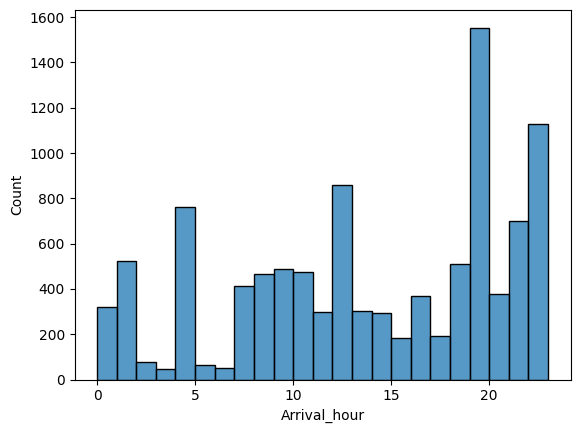

In [204]:
sns.histplot(df.Arrival_hour)

In [205]:
## From mid night 12 to morning 6 people were less likely to arrive or departure